In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -

Draw plots to demonstrate the analysis for the following questions for better visualizations

Write code comments wherever required for code understanding
Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Nasa Data Analysis/nasa_data.csv')
df.head()

,geolocation,name,nametype,:@computed_region_nnqa_25f4,fall,year,recclass,reclat,reclong,id,mass,:@computed_region_cbhk_fwbd
0,"{'type': 'Point', 'coordinates': [6.08333, 50....",Aachen,Valid,NaN,Fell,1880-01-01T00:00:00.000,L5,50.77500,6.08333,1,21.0,NaN
1,"{'type': 'Point', 'coordinates': [10.23333, 56...",Aarhus,Valid,NaN,Fell,1951-01-01T00:00:00.000,H6,56.18333,10.23333,2,720.0,NaN
2,"{'type': 'Point', 'coordinates': [-113, 54.216...",Abee,Valid,NaN,Fell,1952-01-01T00:00:00.000,EH4,54.21667,-113.00000,6,107000.0,NaN
3,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",Acapulco,Valid,NaN,Fell,1976-01-01T00:00:00.000,Acapulcoite,16.88333,-99.90000,10,1914.0,NaN
4,"{'type': 'Point', 'coordinates': [-64.95, -33....",Achiras,Valid,NaN,Fell,1902-01-01T00:00:00.000,L6,-33.16667,-64.95000,370,780.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation                  988 non-null    object 
 1   name                         1000 non-null   object 
 2   nametype                     1000 non-null   object 
 3   :@computed_region_nnqa_25f4  134 non-null    float64
 4   fall                         1000 non-null   object 
 5   year                         999 non-null    object 
 6   recclass                     1000 non-null   object 
 7   reclat                       988 non-null    float64
 8   reclong                      988 non-null    float64
 9   id                           1000 non-null   int64  
 10  mass                         972 non-null    float64
 11  :@computed_region_cbhk_fwbd  133 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 93.9+ KB


In [5]:
df.size

12000

In [6]:
df.shape

(1000, 12)

In [7]:
df.dtypes

geolocation                     object
name                            object
nametype                        object
:@computed_region_nnqa_25f4    float64
fall                            object
year                            object
recclass                        object
reclat                         float64
reclong                        float64
id                               int64
mass                           float64
:@computed_region_cbhk_fwbd    float64
dtype: object

In [8]:
df.isna().sum()

geolocation                     12
name                             0
nametype                         0
:@computed_region_nnqa_25f4    866
fall                             0
year                             1
recclass                         0
reclat                          12
reclong                         12
id                               0
mass                            28
:@computed_region_cbhk_fwbd    867
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

geolocation                    0
name                           0
nametype                       0
:@computed_region_nnqa_25f4    0
fall                           0
year                           0
recclass                       0
reclat                         0
reclong                        0
id                             0
mass                           0
:@computed_region_cbhk_fwbd    0
dtype: int64

In [11]:
num_cols = [fea for fea in df.columns if df[fea].dtypes!='O']
cat_cols = [fea for fea in df.columns if df[fea].dtypes=='O']

In [12]:
num_cols

[':@computed_region_nnqa_25f4',
 'reclat',
 'reclong',
 'id',
 'mass',
 ':@computed_region_cbhk_fwbd']

In [13]:
cat_cols

['geolocation', 'name', 'nametype', 'fall', 'year', 'recclass']

In [14]:
import warnings 
warnings.filterwarnings('ignore')

# Univariate Analysis of the numerical Feature 

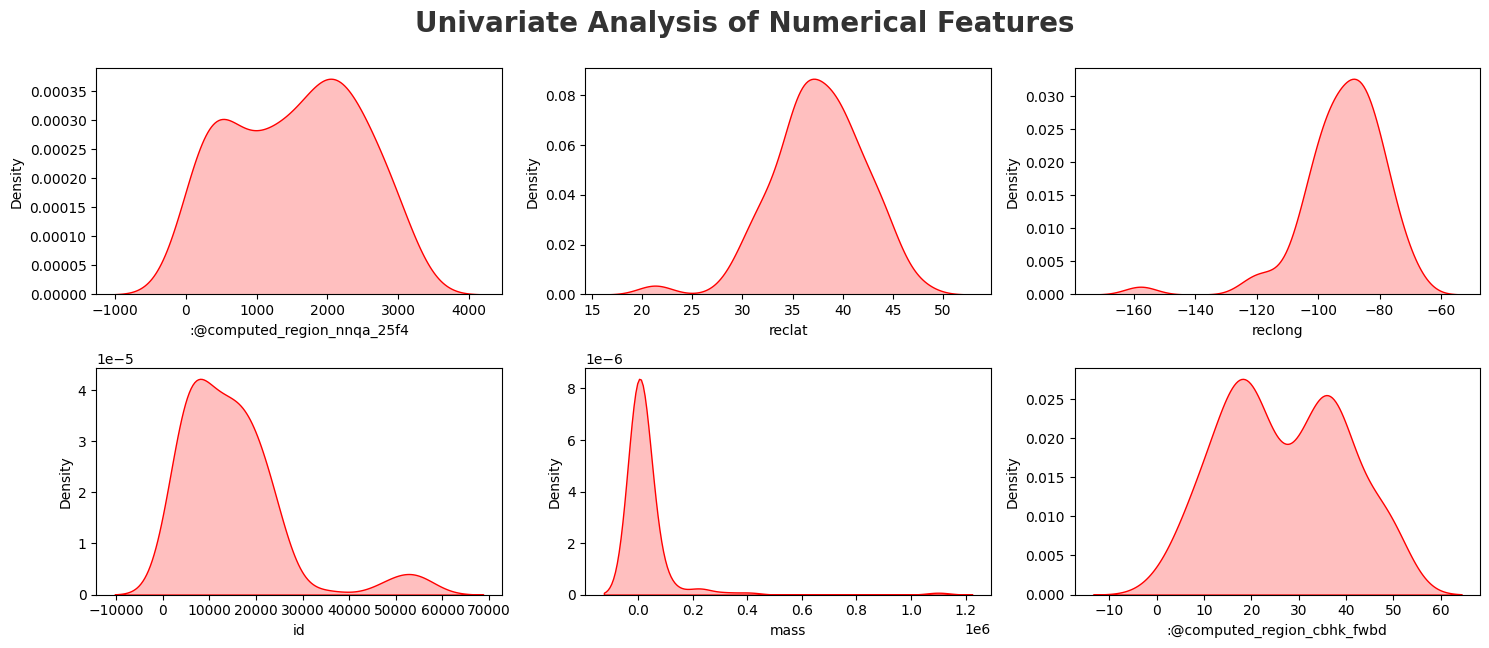

In [15]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_cols[i]],shade=True, color='r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

 Id , Mass and reclong have outliers in the data
 


# Analysis of the categorical feature

In [16]:
cat_cols

['geolocation', 'name', 'nametype', 'fall', 'year', 'recclass']

In [17]:
cat_feature = df[cat_cols]
cat_feature

,geolocation,name,nametype,fall,year,recclass
28,"{'type': 'Point', 'coordinates': [-85.88333, 4...",Allegan,Valid,Fell,1899-01-01T00:00:00.000,H5
34,"{'type': 'Point', 'coordinates': [-70.75, 44.6...",Andover,Valid,Fell,1898-01-01T00:00:00.000,L6
46,"{'type': 'Point', 'coordinates': [-94.3, 38.5]}",Archie,Valid,Fell,1932-01-01T00:00:00.000,H6
49,"{'type': 'Point', 'coordinates': [-97.01, 31.8...",Ash Creek,Valid,Fell,2009-01-01T00:00:00.000,L6
54,"{'type': 'Point', 'coordinates': [-87, 34.75]}",Athens,Valid,Fell,1933-01-01T00:00:00.000,LL6
...,...,...,...,...,...,...
958,"{'type': 'Point', 'coordinates': [-73.13333, 4...",Stratford,Valid,Fell,1974-01-01T00:00:00.000,L6
962,"{'type': 'Point', 'coordinates': [-90.66667, 3...",Success,Valid,Fell,1924-01-01T00:00:00.000,L6
969,"{'type': 'Point', 'coordinates': [-120.90806, ...",Sutter's Mill,Valid,Fell,2012-01-01T00:00:00.000,C
970,"{'type': 'Point', 'coordinates': [-86.2945, 33...",Sylacauga,Valid,Fell,1954-01-01T00:00:00.000,H4


In [18]:
cat_feature['name'].value_counts()

Allegan              1
Mifflin              1
Orlando              1
Norton County        1
Norfork              1
                    ..
Crescent             1
Coleman              1
Colby (Wisconsin)    1
Claxton              1
Tilden               1
Name: name, Length: 132, dtype: int64

In [19]:
cat_feature['name'].duplicated().sum()

0

In [20]:
cat_feature['nametype'].value_counts()

Valid    132
Name: nametype, dtype: int64

In [21]:
cat_feature['nametype'].duplicated().sum()

131

In [22]:
cat_feature['nametype'].drop_duplicates()

28    Valid
Name: nametype, dtype: object

In [23]:
cat_feature['fall'].value_counts()

Fell    132
Name: fall, dtype: int64

In [24]:
cat_feature['fall'].duplicated().sum()

131

In [25]:
cat_feature['fall'].drop_duplicates()

28    Fell
Name: fall, dtype: object

In [26]:
cat_feature['recclass'].value_counts()

L6                   37
H5                   18
H6                   10
L5                    8
LL6                   6
H4                    6
OC                    5
Aubrite               4
Eucrite-pmict         3
Eucrite-mmict         3
Iron, IIIAB           2
CM2                   2
LL5                   2
L4                    2
L/LL6                 1
Iron, IAB-ung         1
L3                    1
H3.4                  1
Eucrite               1
H4-6                  1
LL3.3                 1
Eucrite-cm            1
Iron                  1
Diogenite             1
Mesosiderite-A3/4     1
LL4                   1
Diogenite-pm          1
Howardite             1
H3                    1
CO3.3                 1
EL6                   1
L/LL4                 1
Iron, IVA             1
H4-an                 1
L                     1
H                     1
C2-ung                1
C                     1
Name: recclass, dtype: int64

In [27]:
cat_feature['recclass'].duplicated()

28     False
34     False
46     False
49      True
54     False
       ...  
958     True
962     True
969    False
970     True
992     True
Name: recclass, Length: 132, dtype: bool

In [28]:
cat_feature['recclass'].drop_duplicates()

28                    H5
34                    L6
46                    H6
54                   LL6
67                    L4
84                    H4
92                C2-ung
104        Eucrite-mmict
105                    H
118              Aubrite
122                   L5
140                    L
151                H4-an
158          Iron, IIIAB
175                   OC
187            Iron, IVA
216                  CM2
221                L/LL4
269                  EL6
291    Mesosiderite-A3/4
297                CO3.3
302                   H3
309            Howardite
322         Diogenite-pm
362                  LL4
380                L/LL6
422            Diogenite
587                 Iron
646           Eucrite-cm
702        Eucrite-pmict
703                 H4-6
735              Eucrite
755                   L3
760                  LL5
799        Iron, IAB-ung
911                 H3.4
948                LL3.3
969                    C
Name: recclass, dtype: object

# Multivariate Analysis
Multivariate analysis is the analysis of more than one variable.


In [29]:
df[(list(df.columns)[1:])].corr()

,:@computed_region_nnqa_25f4,reclat,reclong,id,mass,:@computed_region_cbhk_fwbd
:@computed_region_nnqa_25f4,1.000000,-0.104210,-0.014530,0.068487,-0.094514,0.126926
reclat,-0.104210,1.000000,0.314367,0.008498,0.103616,0.206371
reclong,-0.014530,0.314367,1.000000,-0.202172,-0.067497,0.789940
id,0.068487,0.008498,-0.202172,1.000000,0.001421,-0.152696
mass,-0.094514,0.103616,-0.067497,0.001421,1.000000,-0.152439
:@computed_region_cbhk_fwbd,0.126926,0.206371,0.789940,-0.152696,-0.152439,1.000000


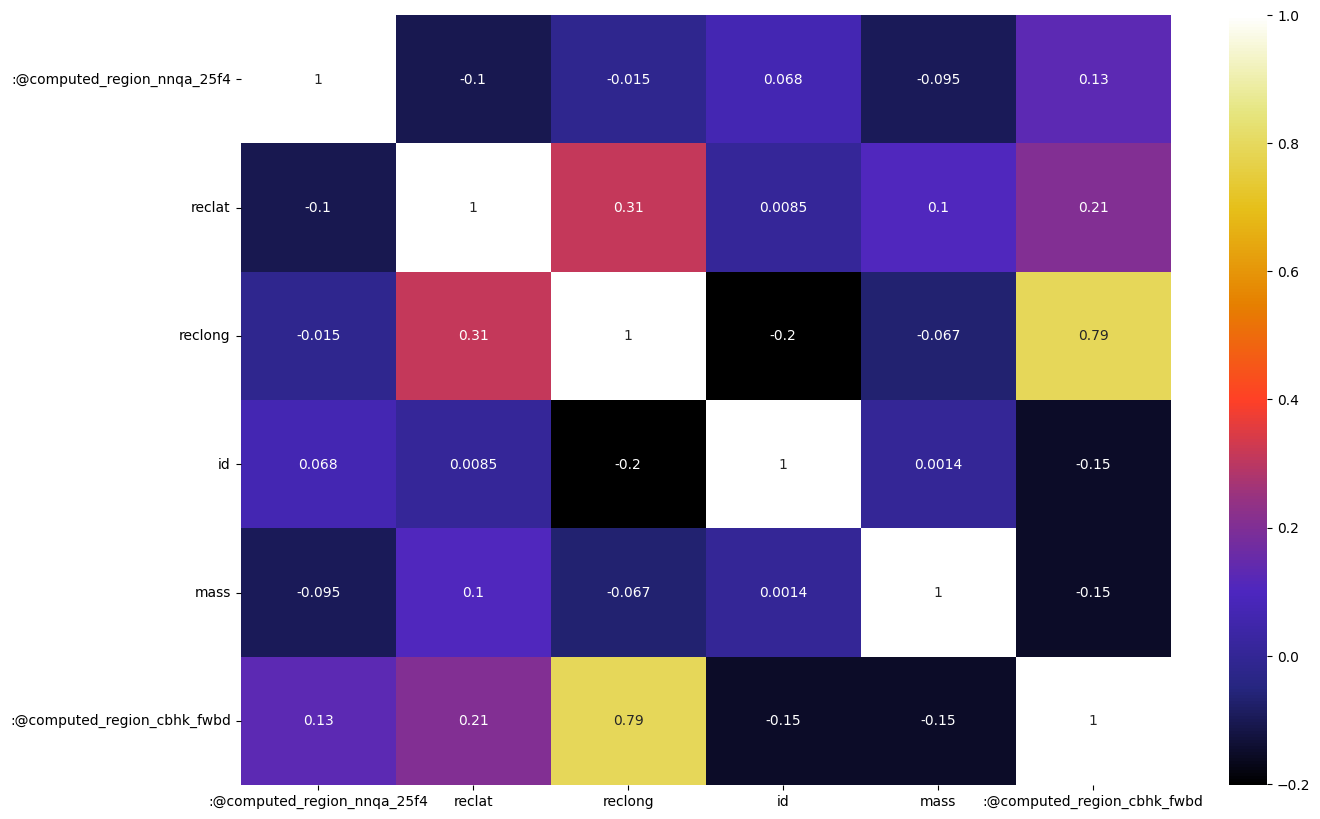

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [31]:
df.head()

,geolocation,name,nametype,:@computed_region_nnqa_25f4,fall,year,recclass,reclat,reclong,id,mass,:@computed_region_cbhk_fwbd
28,"{'type': 'Point', 'coordinates': [-85.88333, 4...",Allegan,Valid,429.0,Fell,1899-01-01T00:00:00.000,H5,42.53333,-85.88333,2276,32000.0,50.0
34,"{'type': 'Point', 'coordinates': [-70.75, 44.6...",Andover,Valid,1723.0,Fell,1898-01-01T00:00:00.000,L6,44.61667,-70.75000,2295,3200.0,49.0
46,"{'type': 'Point', 'coordinates': [-94.3, 38.5]}",Archie,Valid,2697.0,Fell,1932-01-01T00:00:00.000,H6,38.50000,-94.30000,2329,5070.0,18.0
49,"{'type': 'Point', 'coordinates': [-97.01, 31.8...",Ash Creek,Valid,774.0,Fell,2009-01-01T00:00:00.000,L6,31.80500,-97.01000,48954,9500.0,23.0
54,"{'type': 'Point', 'coordinates': [-87, 34.75]}",Athens,Valid,3134.0,Fell,1933-01-01T00:00:00.000,LL6,34.75000,-87.00000,4885,265.0,29.0


In [32]:
df['name'].value_counts()

Allegan              1
Mifflin              1
Orlando              1
Norton County        1
Norfork              1
                    ..
Crescent             1
Coleman              1
Colby (Wisconsin)    1
Claxton              1
Tilden               1
Name: name, Length: 132, dtype: int64